In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Building the movie recommendation system according to the users preferances

In [2]:
# required libraies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# links data

In [3]:
# reading the links data
link_df  = pd.read_csv("/content/drive/MyDrive/movie_data.zip (Unzipped Files)/links.csv")
link_df

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [4]:
# shape of links data
# 2 q
link_df.shape

(9742, 3)

In [5]:
# null values
link_df.isna().sum()


movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [6]:
mean_link_df = link_df["tmdbId"].mean()
mean_link_df

55162.123792890896

In [7]:
median=link_df["tmdbId"].median()
median

16529.0

In [8]:
link_df[link_df["tmdbId"].isna()]

,movieId,imdbId,tmdbId
624,791,113610,NaN
843,1107,102336,NaN
2141,2851,81454,NaN
3027,4051,56600,NaN
5532,26587,92337,NaN
5854,32600,377059,NaN
6059,40697,105946,NaN
7382,79299,874957,NaN


In [9]:
link_df["tmdbId"] = link_df["tmdbId"].fillna(median)

In [10]:

link_df.isna().sum()

movieId    0
imdbId     0
tmdbId     0
dtype: int64

# movies data

In [11]:
# 3 shape of movies data
# movies data reading
movies_df  = pd.read_csv("/content/drive/MyDrive/movie_data.zip (Unzipped Files)/movies.csv")
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [12]:
# 3. shape of movies data
movies_df.shape

(9742, 3)

In [13]:
# null valus  movies data
movies_df.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [14]:
# duplicated
movies_df.duplicated().sum()

0

In [15]:
# ratings data

rating_df = pd.read_csv("/content/drive/MyDrive/movie_data.zip (Unzipped Files)/ratings.csv")
rating_df



,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [16]:
# null values rating_df
rating_df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [17]:
# duplate values in rating_df
rating_df.duplicated().sum()

0

In [18]:
# 4.  How many unique "userId" are available in "ratings.csv"?

total_unique_user_ids = rating_df['userId'].nunique()
total_unique_user_ids

610

In [19]:
unique_user_ids = rating_df['userId'].unique()
unique_user_ids

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [20]:
# 5 Which movie has recieved maximum number of user ratings?

In [21]:
# merge the data of rating and movies
movies_rating_df = movies_df.merge(rating_df,how="right")
movies_rating_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,3,Grumpier Old Men (1995),Comedy|Romance,1,4.0,964981247
2,6,Heat (1995),Action|Crime|Thriller,1,4.0,964982224
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1,5.0,964983815
4,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1,5.0,964982931
...,...,...,...,...,...,...
100831,166534,Split (2017),Drama|Horror|Thriller,610,4.0,1493848402
100832,168248,John Wick: Chapter Two (2017),Action|Crime|Thriller,610,5.0,1493850091
100833,168250,Get Out (2017),Horror,610,5.0,1494273047
100834,168252,Logan (2017),Action|Sci-Fi,610,5.0,1493846352


In [22]:
movies_rating_df.isna().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [23]:
import datetime as dt

In [24]:
highest_movie_ratings = movies_rating_df["title"].value_counts()[:20]
highest_movie_ratings

Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
Star Wars: Episode IV - A New Hope (1977)                                         251
Jurassic Park (1993)                                                              238
Braveheart (1995)                                                                 237
Terminator 2: Judgment Day (1991)                                                 224
Schindler's List (1993)                                                           220
Fight Club (1999)                                                                 218
Toy Story (1995)                                      

In [25]:
highest_rating_movie = highest_movie_ratings.idxmax()
most_rating_movie_count =highest_movie_ratings.max()
print(f"The most  rated movie'{highest_rating_movie}' with {most_rating_movie_count} ratings.")


The most  rated movie'Forrest Gump (1994)' with 329 ratings.


<ipython-input-26-739d654b2737>:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


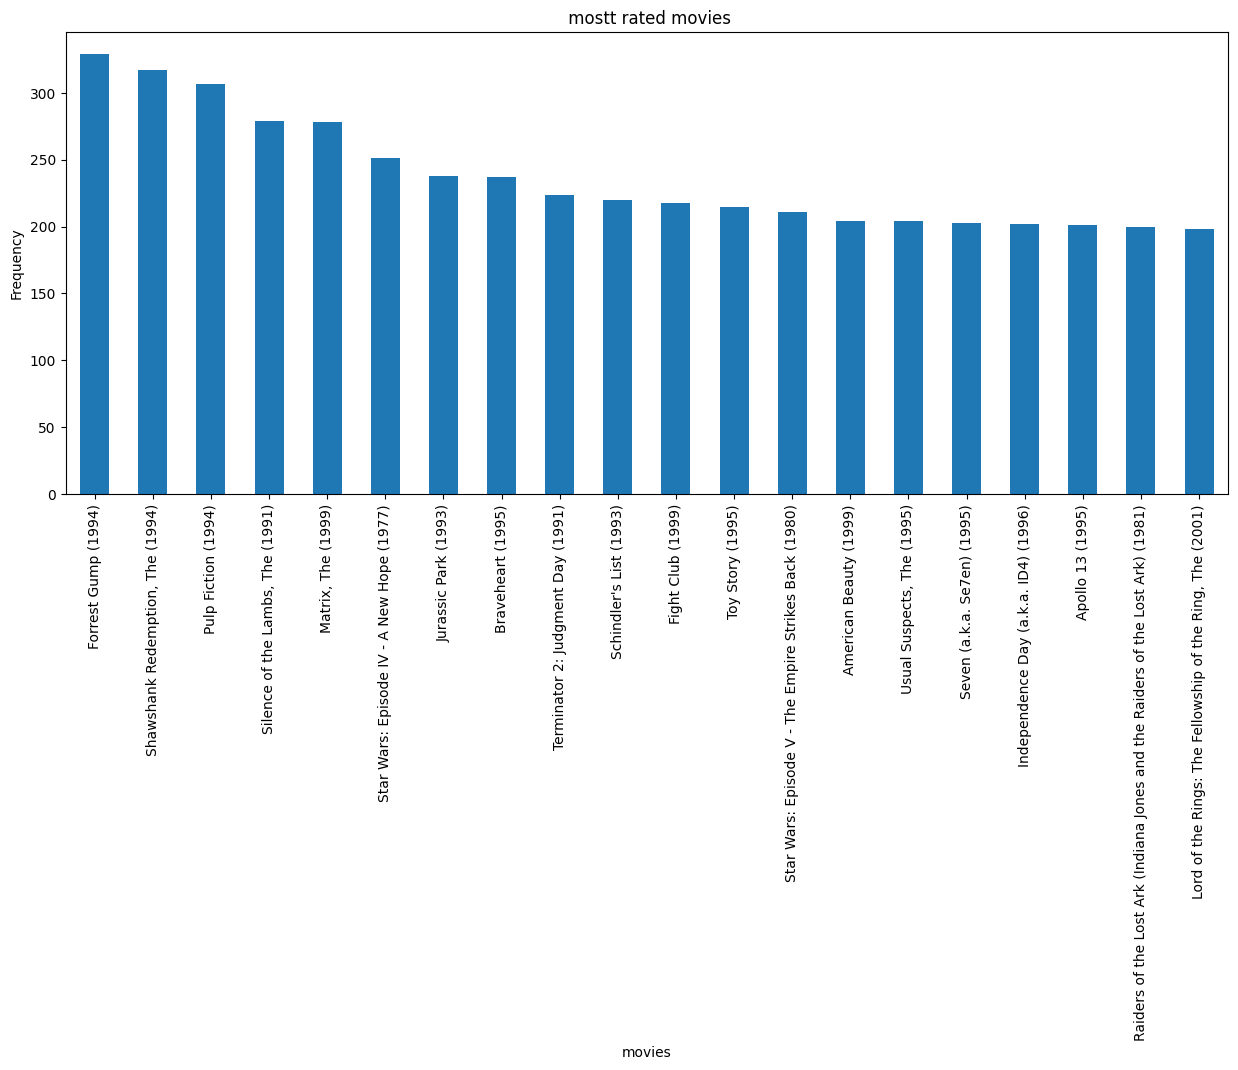

In [26]:
movie_column = movies_rating_df['title']

# histogram
plt.figure(figsize=(15, 6))
movie_column.value_counts()[:20].plot(kind='bar')
plt.title(' mostt rated movies')
plt.xlabel('movies')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# tags data

In [27]:
# reading the tags data
tags_df = pd.read_csv("/content/drive/MyDrive/movie_data.zip (Unzipped Files)/tags.csv")
tags_df

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [56]:
movie_tag_df = pd.merge(movies_df,tags_df,on="movieId" )
movie_tag_df

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932
...,...,...,...,...,...,...
3678,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,star wars,1528934552
3679,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,anime,1537098582
3680,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,comedy,1537098587
3681,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,gintama,1537098603


In [29]:
movie_tag_df.isna().sum()

movieId      0
title        0
genres       0
userId       0
tag          0
timestamp    0
dtype: int64

In [30]:
# duplicate values after merging tags and movies
movie_tag_df.duplicated().sum()

0

In [31]:
# 6. Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [35]:
matrix_tags = movie_tag_df[(movie_tag_df["title"]=="Matrix, The (1999)")][["tag"]]
matrix_tags

,tag
815,martial arts
816,sci-fi
1646,alternate universe
2794,philosophy
2795,post apocalyptic


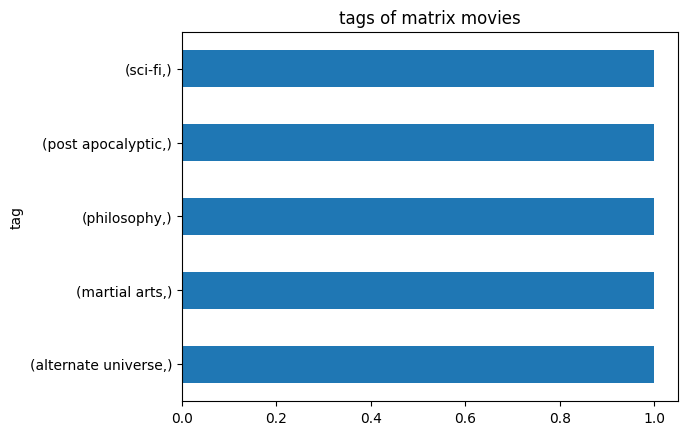

In [36]:
matrix_tags.value_counts().plot(kind="barh")
plt.title("tags of matrix movies")
plt.show()

In [37]:
# 7. What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [38]:
average_user_rating = movies_rating_df[(movies_rating_df["title"]=="Terminator 2: Judgment Day (1991)")][["rating"]].mean()
print("The average rating of Terminator 2: Judgment Day (1991) is ", average_user_rating)

The average rating of Terminator 2: Judgment Day (1991) is  rating    3.970982
dtype: float64


In [39]:
# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

<Axes: xlabel='rating', ylabel='Density'>

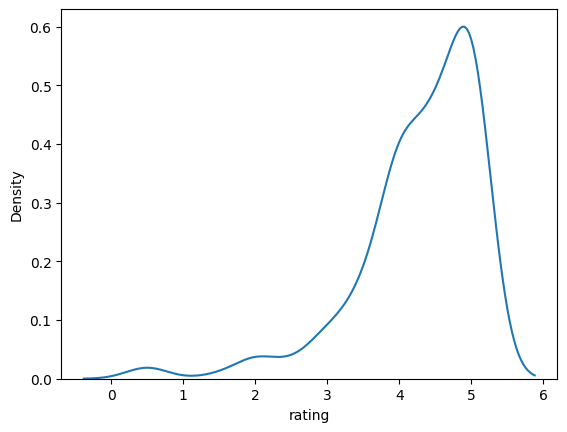

In [58]:
user_ratings_fight_club = movies_rating_df[(movies_rating_df["title"]=="Fight Club (1999)")]["rating"]
sns.kdeplot(user_ratings_fight_club)

# Left skewed distribution

In [61]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [62]:
# Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.
mov_rat_df= pd.merge( movies_df,rating_df, on = 'movieId')
mov_rat_df["rating"].count()

100836

In [63]:
mov_rat_df["rating"].mean()

3.501556983616962

In [64]:
#1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.

grouped_ratings_df = rating_df.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
grouped_ratings_df

movieId rating          
              count      mean
0          1    215  3.920930
1          2    110  3.431818
2          3     52  3.259615
3          4      7  2.357143
4          5     49  3.071429
...      ...    ...       ...
9719  193581      1  4.000000
9720  193583      1  3.500000
9721  193585      1  3.500000
9722  193587      1  3.500000
9723  193609      1  4.000000

[9724 rows x 3 columns]

In [67]:
grouped_ratings_df.columns = ['movieId', 'rating_count', 'rating_mean']

In [68]:
#2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
movie_merged_df = pd.merge(movies_df, grouped_ratings_df, on='movieId', how='inner')

In [70]:
#3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

filtered_movies_df= movie_merged_df[movie_merged_df['rating_count'] > 50]

In [71]:
filtered_movies_df

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [74]:
#Which movie is the most popular based on  average user ratings?
filtered_movies_df.sort_values(by="rating_mean",ascending=False)[:10]

,movieId,title,genres,rating_count,rating_mean
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
659,858,"Godfather, The (1972)",Crime|Drama,192,4.289062
2224,2959,Fight Club (1999),Action|Crime|Drama|Thriller,218,4.272936
974,1276,Cool Hand Luke (1967),Drama,57,4.271930
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97,4.268041
686,904,Rear Window (1954),Mystery|Thriller,84,4.261905
921,1221,"Godfather: Part II, The (1974)",Crime|Drama,129,4.259690
6298,48516,"Departed, The (2006)",Crime|Drama|Thriller,107,4.252336
913,1213,Goodfellas (1990),Crime|Drama,126,4.250000
694,912,Casablanca (1942),Drama|Romance,100,4.240000


In [85]:
filtered_movies_df.sort_values(by="rating_count",ascending=False)

,movieId,title,genres,rating_count,rating_mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
...,...,...,...,...,...
3147,4239,Blow (2001),Crime|Drama,51,3.813725
3490,4776,Training Day (2001),Crime|Drama|Thriller,51,3.794118
3539,4848,Mulholland Drive (2001),Crime|Drama|Film-Noir|Mystery|Thriller,51,3.843137
118,145,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller,51,3.245098


In [81]:
# Which Sci-Fi movie is "third most popular" based on the number of user ratings?

filtered_movies_df[filtered_movies_df['genres'].apply(lambda x: 'Sci-Fi' in x.split('|'))].sort_values(by='rating_count',ascending=False)

,movieId,title,genres,rating_count,rating_mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640
...,...,...,...,...,...
8673,122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi,54,3.833333
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245
2028,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,53,2.207547
559,673,Space Jam (1996),Adventure|Animation|Children|Comedy|Fantasy|Sc...,53,2.707547
